### Librerias

*Selección e importación:* las librerias seleccionadas e importadas a continuación son las necesarias para realizar un análisis exploratorio del DataFrame "Peliculas".

In [103]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from scipy import stats
from sklearn.preprocessing import LabelEncoder

### Análisis exploratorio de datos

*Caracterización del DataFrame:* Para realizar la caracterización del DataFrame se determinó cantidad de filas y columnas, nombre de las columnas y tipos de variables.

In [104]:
df = pd.read_csv('Movie_Data_File2.csv')

In [105]:
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


In [106]:
#Cantidad de filas y columnas
df.shape

(10002, 29)

In [107]:
#Nombre de las columnas y tipos de variables
df.dtypes

Film_title            object
Release_year         float64
Director              object
Cast                  object
Average_rating       float64
Owner_rating         float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Spoken_languages      object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
½                      int64
★                      int64
★½                     int64
★★                     int64
★★½                    int64
★★★                    int64
★★★½                   int64
★★★★                   int64
★★★★½                  int64
★★★★★                  int64
Total_ratings          int64
Film_URL              object
dtype: object

**Analisis de variables categoricas**

*Cast*

Eliminar datos de la columna Cast, dejando solamente los dos primeros actores

In [108]:
def extraer_dos_actores(cadena):
    if isinstance(cadena, str):
        actores = [actor.strip() for actor in cadena.split(',')]
        return pd.Series(actores[:2]) 
    return pd.Series([None, None]) 

df[['Protagonista', 'Coprotagonista']] = df['Cast'].apply(extraer_dos_actores)
df.drop(columns=['Cast'], inplace=True)


In [109]:
print(df[['Protagonista', 'Coprotagonista']].head())

          Protagonista        Coprotagonista
0  ['Désirée Nosbusch'        'Bodo Staiger'
1         ['Tom Hardy'     'Charlize Theron'
2    ['Jessica Harper'     'Stefania Casini'
3       ['Bill Murray'  'Scarlett Johansson'
4      ['Mitsuo Iwata'       'Nozomu Sasaki'


Observamos que hay Protagonistas repetidos, por lo tanto procederemos a unificarlos

In [110]:
df['Protagonista'] = df['Protagonista'].astype(str)  

df['Protagonista'] = df['Protagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Protagonista'] = df['Protagonista'].str.strip()

df['Protagonista'] = df['Protagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Haremos lo mismo con los coprotagonistas

In [111]:
df['Coprotagonista'] = df['Coprotagonista'].astype(str)  

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Coprotagonista'] = df['Coprotagonista'].str.strip()

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Realizamos el conteo

In [112]:
conteo_Protagonista = df['Protagonista'].value_counts()
print(conteo_Protagonista)

Protagonista
None                 57
Mel Blanc            49
Nicolas Cage         36
Sean Connery         33
Johnny Depp          33
                     ..
Madonna               1
Jonathan Lipnicki     1
Martina Gedeck        1
Halina Reijn          1
Olivia Wilde          1
Name: count, Length: 5064, dtype: int64


In [113]:
conteo_Coprotagonista = df['Coprotagonista'].value_counts()
print(conteo_Coprotagonista)

Coprotagonista
nan                 86
None                57
Tommy Lee Jones     14
Robert De Niro      14
Rose Byrne          13
                    ..
Kristen Connolly     1
Josefine Preuß       1
Aylin Tezel          1
Julia Koschitz       1
Allison Williams     1
Name: count, Length: 6284, dtype: int64


*Genres*

Eliminar datos de la columna Genres, dejando solamente el primero

In [114]:
def extraer_primer_genero(cadena):
    if isinstance(cadena, str):
        generos = [g.strip() for g in cadena.split(',')]
        return generos[0] if generos else ''
    return ''
df['Genres'] = df['Genres'].apply(extraer_primer_genero)

In [115]:
print(df[['Genres']].head())

         Genres
0     ['Horror'
1  ['Adventure'
2    ['Horror']
3      ['Drama'
4  ['Animation'


Observamos que hay generos repetidos, por lo tanto procederemos a unificarlos

In [116]:
df['Genres'] = df['Genres'].astype(str)  

df['Genres'] = df['Genres'].str.replace(r"[\[\]']", "", regex=True)

df['Genres'] = df['Genres'].str.strip()

df['Genres'] = df['Genres'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que no hay valores repetidos

In [117]:
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes' '']


Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga. 

In [118]:
conteo = (df['Genres'] == '').sum()
print(conteo)

24


In [119]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Genres'] = df['Genres'].str.strip()
df = df[df['Genres'] != '']

In [120]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes']


Realizamos el conteo

In [121]:
conteo_Genres = df['Genres'].value_counts()
print(conteo_Genres)

Genres
Drama              2232
Comedy             1423
Horror              867
Thriller            802
Action              734
Crime               529
Romance             504
Science Fiction     443
Adventure           421
Documentary         338
Fantasy             333
Mystery             261
Animation           231
Family              219
History             164
Western             159
War                 129
Music               118
TV Movie             69
Epic heroes           2
Name: count, dtype: int64


*Countries*

Eliminar datos de la columna Countries, dejando solamente el primero

In [122]:
def extraer_primer_pais(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Countries'] = df['Countries'].apply(extraer_primer_pais)


In [123]:
print(df[['Countries']].head())

      Countries
0   ['Germany']
1  ['Australia'
2     ['Italy']
3         ['UK'
4     ['Japan']


In [124]:
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
["['Germany']" "['Australia'" "['Italy']" "['UK'" "['Japan']" "['Germany'"
 "['USA']" "['UK']" "['France'" "['Ireland'" "['USA'" "['Belgium'"
 "['Mexico'" "['Czechoslovakia'" "['Mexico']" "['South Korea'"
 "['France']" "['New Zealand'" "['Italy'" "['Hong Kong']"
 "['South Korea']" "['Canada'" "['Canada']" "['China'" "['USSR']"
 "['Denmark'" "['Japan'" "['Austria']" "['Australia']" "['Sweden']"
 "['Spain']" "['India'" "['Brazil'" "['Sweden'" "['Switzerland'"
 "['Netherlands']" "['Spain'" "['Netherlands'" "['Poland']" "['Czechia'"
 "['Hong Kong'" "['New Zealand']" "['Slovakia'" "['Bulgaria'" "['Hungary'"
 '' "['USSR'" "['Austria'" "['Russia'" "['Iceland'" "['Turkey'"
 "['United Arab Emirates'" "['South Africa'" "['Thailand'" "['Greece']"
 "['Greece'" "['Poland'" "['Norway']" "['Argentina'" "['Indonesia']"
 "['Philippines'" "['Colombia'" "['Czechoslovakia']" "['Russia']"
 "['Indonesia'" "['Ireland']" "['Chile'" "['Turkey']" "['Romania'"
 "['India

Observamos que hay paises repetidos, por lo tanto procederemos a unificarlos

In [125]:
df['Countries'] = df['Countries'].astype(str)  

df['Countries'] = df['Countries'].str.replace(r"[\[\]']", "", regex=True)

df['Countries'] = df['Countries'].str.strip()

df['Countries'] = df['Countries'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que ya no haya valores repetidos

In [126]:
df['Countries'].unique()

array(['Germany', 'Australia', 'Italy', 'UK', 'Japan', 'USA', 'France',
       'Ireland', 'Belgium', 'Mexico', 'Czechoslovakia', 'South Korea',
       'New Zealand', 'Hong Kong', 'Canada', 'China', 'USSR', 'Denmark',
       'Austria', 'Sweden', 'Spain', 'India', 'Brazil', 'Switzerland',
       'Netherlands', 'Poland', 'Czechia', 'Slovakia', 'Bulgaria',
       'Hungary', '', 'Russia', 'Iceland', 'Turkey',
       'United Arab Emirates', 'South Africa', 'Thailand', 'Greece',
       'Norway', 'Argentina', 'Indonesia', 'Philippines', 'Colombia',
       'Chile', 'Romania', 'Singapore', 'Israel', 'Cross Country',
       'Ukraine', 'Dominican Republic', 'Libya', 'Iraq', 'Bolivia',
       'Lithuania', 'Malaysia', 'Finland', 'Luxembourg', 'Taiwan',
       'Syrian Arab Republic', 'Ivory Coast', 'Country Club', 'Bahamas',
       'Cuba', 'Jamaica', 'Iran', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Nepal', 'Serbia', 'Portugal', 'Aruba', 'Ecuador',
       'Panama', 'Estonia', 'Uganda', 'Jorda

Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga.

Primero veremos cuantas filas contienen ' '

In [127]:
conteo = (df['Countries'] == '').sum()
print(conteo)

105


In [128]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Countries'] = df['Countries'].str.strip()
df = df[df['Countries'] != '']

In [129]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
['Germany' 'Australia' 'Italy' 'UK' 'Japan' 'USA' 'France' 'Ireland'
 'Belgium' 'Mexico' 'Czechoslovakia' 'South Korea' 'New Zealand'
 'Hong Kong' 'Canada' 'China' 'USSR' 'Denmark' 'Austria' 'Sweden' 'Spain'
 'India' 'Brazil' 'Switzerland' 'Netherlands' 'Poland' 'Czechia'
 'Slovakia' 'Bulgaria' 'Hungary' 'Russia' 'Iceland' 'Turkey'
 'United Arab Emirates' 'South Africa' 'Thailand' 'Greece' 'Norway'
 'Argentina' 'Indonesia' 'Philippines' 'Colombia' 'Chile' 'Romania'
 'Singapore' 'Israel' 'Cross Country' 'Ukraine' 'Dominican Republic'
 'Libya' 'Iraq' 'Bolivia' 'Lithuania' 'Malaysia' 'Finland' 'Luxembourg'
 'Taiwan' 'Syrian Arab Republic' 'Ivory Coast' 'Country Club' 'Bahamas'
 'Cuba' 'Jamaica' 'Iran' 'Bosnia and Herzegovina' 'Burkina Faso' 'Nepal'
 'Serbia' 'Portugal' 'Aruba' 'Ecuador' 'Panama' 'Estonia' 'Uganda'
 'Jordan' 'Pakistan' 'Nigeria' 'Yugoslavia' 'Malawi' 'Ghana' 'Lebanon'
 'Peru' 'Albania' 'Egypt' 'Netherlands Antilles' 'Mongolia' 'Be

Realizamos el conteo

In [130]:
conteo_Countries = df['Countries'].value_counts()
print(conteo_Countries)

Countries
USA                                  5636
UK                                    863
France                                525
Italy                                 373
Canada                                354
                                     ... 
Netherlands Antilles                    1
Mongolia                                1
Benin                                   1
"Lao Peoples Democratic Republic"       1
Morocco                                 1
Name: count, Length: 90, dtype: int64


*Studios*

Eliminar datos de la columna Studios, dejando solamente el primero

In [131]:
def extraer_primer_productor(cadena):
    if isinstance(cadena, str):
        productor = [g.strip() for g in cadena.split(',')]
        return productor [0] if productor else ''
    return ''
df['Studios'] = df['Studios'].apply(extraer_primer_productor)

In [132]:
print(df[['Studios']].head())

                       Studios
0  ['Barbara Moorse Workshop']
1     ['Warner Bros. Pictures'
2          ['Seda Spettacoli']
3         ['American Zoetrope'
4                       ['MBS'


Eliminamos los Studios repetidos y verificamos que se hayan realizado los cambios con exito.

In [133]:
df['Studios'] = df['Studios'].astype(str)  

df['Studios'] = df['Studios'].str.replace(r"[\[\]']", "", regex=True)

df['Studios'] = df['Studios'].str.strip()

df['Studios'] = df['Studios'].str.replace(r"\s*,\s*", ", ", regex=True)

In [134]:
conteo_Studios = df['Studios'].value_counts()
print(conteo_Studios)

Studios
Paramount Pictures           303
Universal Pictures           249
                             222
Columbia Pictures            217
Warner Bros. Pictures        203
                            ... 
Futura Films                   1
C.A.P.A.C.                     1
Carlton Film Export            1
Films Jean Alexandre           1
Testa Gay Cinematografica      1
Name: count, Length: 4522, dtype: int64


*Director*

Eliminar datos de la columna Director, dejando solamente el primero

In [135]:
def extraer_primer_director(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Director'] = df['Director'].apply(extraer_primer_pais)

In [136]:
conteo_directores = df['Director'].value_counts()
print(conteo_directores)

Director
Chuck Jones           54
Cirio H. Santiago     41
Antonio Margheriti    39
William Witney        33
Steven Spielberg      31
                      ..
Yuval Adler            1
Ali Selim              1
Jean Negulesco         1
Clement Virgo          1
Kazuo Komizu           1
Name: count, Length: 4473, dtype: int64


**Columnas**

*Creación de nueva variable*

Variable Porcentje_Likes

In [137]:
df['Porcentaje_likes'] = (df['Likes'] / df['Watches'])*100
print(df.columns)

Index(['Film_title', 'Release_year', 'Director', 'Average_rating',
       'Owner_rating', 'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '½', '★', '★½', '★★', '★★½', '★★★',
       '★★★½', '★★★★', '★★★★½', '★★★★★', 'Total_ratings', 'Film_URL',
       'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


*Eliminación de columnas*

Eliminamos las columnas que no utilizaremos para aplicar el modelo de aprendizaje supervisado, ya sea porque no son objeto de nuestro analisis o porque repiten información.

In [138]:
#Eliminación de columnas: Release_year por tener totalidad de datos faltantes y el resto de la columnas por no contener información necesaria para nuestro análisis
df = df.drop(columns=['Release_year', 'Owner_rating' , 'Spoken_languages', 'List_appearances', 'Fans', 'Likes' ,  '½' , '★' , '★½' , '★★' , '★★½' , '★★★' , '★★★½' , '★★★★' , '★★★★½' , '★★★★★','Film_URL'])

In [139]:
#Comprobamos la eliminación de las columnas no deseadas
df.shape
df.dtypes

Film_title            object
Director              object
Average_rating       float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Description           object
Studios               object
Watches                int64
Total_ratings          int64
Protagonista          object
Coprotagonista        object
Porcentaje_likes     float64
dtype: object

*Traducción del nombre de las columnas*

In [140]:
#Cambio del nombre de las columnas 
df = df.rename(columns={'Film_title' : 'Titulo' , 'Average_rating' : 'Calificación_promedio', 'Genres' : 'Genero', 'Runtime' : 'Duración' , 'Countries' : 'Pais' , 'Original_language' : 'Lenguaje' , 'Description' : 'Descripción' , 'Studios' : 'Productora' , 'Watches' : 'Vistas', 'Total_ratings': 'Ratings'})
print(df.columns)

Index(['Titulo', 'Director', 'Calificación_promedio', 'Genero', 'Duración',
       'Pais', 'Lenguaje', 'Descripción', 'Productora', 'Vistas', 'Ratings',
       'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


**Valores faltantes**

*Identificacion de valores faltantes y manejo* 

In [141]:
#Identificación de valores faltantes
df.isnull().sum()

Titulo                     0
Director                   0
Calificación_promedio    522
Genero                     0
Duración                   8
Pais                       0
Lenguaje                   0
Descripción                2
Productora                 0
Vistas                     0
Ratings                    0
Protagonista               0
Coprotagonista             0
Porcentaje_likes           0
dtype: int64

Obtenemos % de datos faltantes numericos para definir el manejo de los mismos

In [142]:
masnan = df.isnull().sum().max()
filas_total= len(df)
resultado1 = (masnan / filas_total) * 100
print(f"El porcentaje máximo de valores nulos por columna es igual a {resultado1:.2f} %")

El porcentaje máximo de valores nulos por columna es igual a 5.29 %


La falta de datos numéricos es aleatoria y por lo tanto los manejaremos a través de la *Imputación Simple* utilizando la media, ya que con la *Eliminación de filas* perderíamos infrmación importante contenida en el resto de las columnas de la misma fila. Por otra parte, al ser bajo el % de datos faltantes respecto a la totalidad, la Imputación no cambiara la distribución de nuestros datos.

Se utiliza SimpleImputer(strategy='mean') para completar Calificación_promedio y Duración.

In [143]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Calificación_promedio']=imp.fit_transform(df[['Calificación_promedio']])

In [144]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Duración']=imp.fit_transform(df[['Duración']])

In [145]:
#Compruebo que la imputación de los datos numéricos se realizó con exito
df.isnull().sum()

Titulo                   0
Director                 0
Calificación_promedio    0
Genero                   0
Duración                 0
Pais                     0
Lenguaje                 0
Descripción              2
Productora               0
Vistas                   0
Ratings                  0
Protagonista             0
Coprotagonista           0
Porcentaje_likes         0
dtype: int64

Eliminación de datos faltantes categóricos

In [146]:
df = df.dropna(subset=['Descripción'], axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9871 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Titulo                 9871 non-null   object 
 1   Director               9871 non-null   object 
 2   Calificación_promedio  9871 non-null   float64
 3   Genero                 9871 non-null   object 
 4   Duración               9871 non-null   float64
 5   Pais                   9871 non-null   object 
 6   Lenguaje               9871 non-null   object 
 7   Descripción            9871 non-null   object 
 8   Productora             9871 non-null   object 
 9   Vistas                 9871 non-null   int64  
 10  Ratings                9871 non-null   int64  
 11  Protagonista           9871 non-null   object 
 12  Coprotagonista         9871 non-null   object 
 13  Porcentaje_likes       9871 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


**Outliers**

*Identificacion de Outliers y manejo*

Identificamos que variables contienen valores numericos

In [147]:
print(df.select_dtypes(include=['number']).columns)

Index(['Calificación_promedio', 'Duración', 'Vistas', 'Ratings',
       'Porcentaje_likes'],
      dtype='object')


Visualización de distribución y valores extremos para luego seleccionar la estrategia de manejo.

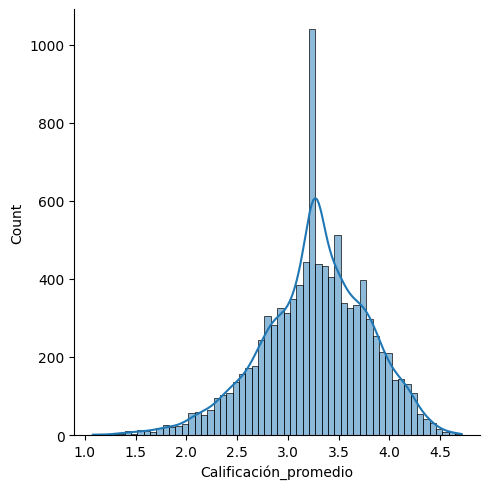

In [148]:
sns.displot(df['Calificación_promedio'], kde=True) 
sns.despine() 

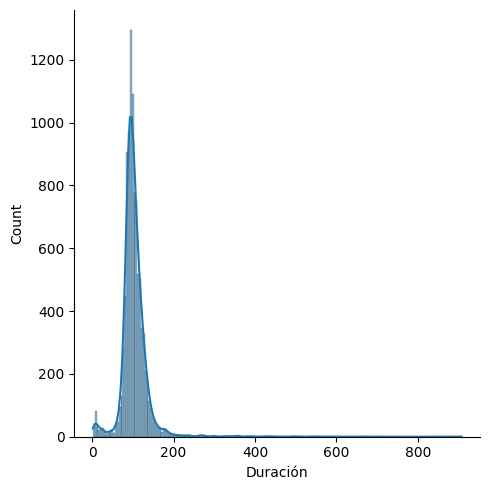

In [149]:
sns.displot(df['Duración'], kde=True) 
sns.despine() 

Debido a que las variables Calificación promedio y Duración presentan distribución normal utilizaremos zscore para detectar outliers

*Calificación_promedio*

In [150]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Calificación_promedio'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Calificación_promedio', 'zscore']])

Cantidad de outliers encontrados: 54
      Calificación_promedio    zscore
157                    1.49 -3.370698
650                    1.57 -3.219093
1050                   1.66 -3.048536
1100                   1.65 -3.067487
1172                   1.68 -3.010635
1705                   1.35 -3.636009
1827                   1.43 -3.484403
1993                   1.56 -3.238043
2506                   1.28 -3.768664
2575                   1.49 -3.370698
2935                   1.53 -3.294896
3215                   1.63 -3.105388
3220                   1.11 -4.090826
3221                   1.40 -3.541255
3222                   1.54 -3.275945
3223                   1.57 -3.219093
3227                   1.62 -3.124339
3812                   1.34 -3.654959
4176                   1.24 -3.844467
4178                   1.29 -3.749713
4333                   1.60 -3.162240
4366                   1.44 -3.465452
4367                   1.68 -3.010635
4531                   1.52 -3.313846
4652         

In [151]:
print("Valor mínimo:", df['Calificación_promedio'].min())
print("Valor máximo:", df['Calificación_promedio'].max())

Valor mínimo: 1.08
Valor máximo: 4.71


La calificación promedio tiene un rango de 1 a 5 por lo tanto los valores que estadisticamente son identificados como outliers, son calificaciones promedio bajas pero se encuntran dentro del rango que podria recibir una pelicula, por lo tanto dichos valores seran conservados.

*Duración*

In [152]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 105
      Duración     zscore
12       228.0   3.297172
145      233.0   3.429602
369      467.0   9.627332
717      379.0   7.296562
889      316.0   5.627942
...        ...        ...
9908     600.0  13.149973
9909     300.0   5.204166
9916     585.0  12.752683
9994     344.0   6.369551
9996     270.0   4.409585

[105 rows x 2 columns]


Hacemos un top 10 de las peliculas con mayor duracion para ver a que se tratan los valores fuera de rango.

In [153]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
9166                    I, Claudius              Herbert Wise   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Cuando analizamos los ouliers de duración observamos que los valores mas altos son series y no son objeto de nuestro estudio, por lo tanto buscaremos palabras claves dentro del titulo y la descripción que nos indiquen cuantas hay.

In [154]:
keywords = ['season', 'episode', 'series', 'part']

def check_series(row):
    Titulo = str(row['Titulo']).lower() if pd.notna(row['Titulo']) else ''
    Descripción = str(row['Descripción']).lower() if pd.notna(row['Descripción']) else ''
    text = Titulo + Descripción  
    return any(keyword in text for keyword in keywords)

df['is_series'] = df.apply(check_series, axis=1)
print(df['is_series'].sum())

1077


Eliminamos las series 

In [155]:
df = df[~df['is_series']]

Volvemos a realizar el analisis de los outliers

In [156]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 88
      Duración     zscore
12       228.0   3.398041
145      233.0   3.534422
369      467.0   9.917053
717      379.0   7.516747
889      316.0   5.798346
...        ...        ...
9835     326.0   6.071108
9908     600.0  13.544787
9909     300.0   5.361927
9916     585.0  13.135644
9994     344.0   6.562080

[88 rows x 2 columns]


In [157]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   
8689                      The Stand                Josh Boone   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Observamos que no se eliminaron todos los outliers y que seguimos teniendo series en nuestra lista, por lo tanto pondremos un limite de 210 minutos (3,5 horas).

In [158]:
df = df[df['Duración'] <= 210.0]

# Mostrar cantidad de filas antes y después
print("Filas originales:", len(df))
print("Filas después del filtrado:", len(df))

Filas originales: 8704
Filas después del filtrado: 8704


In [159]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                       Titulo                  Director  \
8826            Mrs. Fletcher         Nicole Holofcener   
7530             The Irishman           Martin Scorsese   
2691            War and Peace                King Vidor   
1842            Seven Samurai            Akira Kurosawa   
5414               Shackleton         Charles Sturridge   
2986  The Fighting Devil Dogs              John English   
5526          World on a Wire  Rainer Werner Fassbinder   
3071            Boccaccio '70          Vittorio De Sica   
1319                Malcolm X                 Spike Lee   
1335                    Giant            George Stevens   

      Calificación_promedio           Genero  Duración       Pais  Lenguaje  \
8826               3.600000            Drama     210.0        USA   English   
7530               3.910000          History     209.0        USA   English   
2691               3.350000            Drama     208.0      Italy   English   
1842               4.610000       

Observamos que el filtro se aplicó con exito

Debido a que las variable Vistas y Ratings tienen sesgo utilizaremos el metodo Rango intercuartilico para detectar outliers

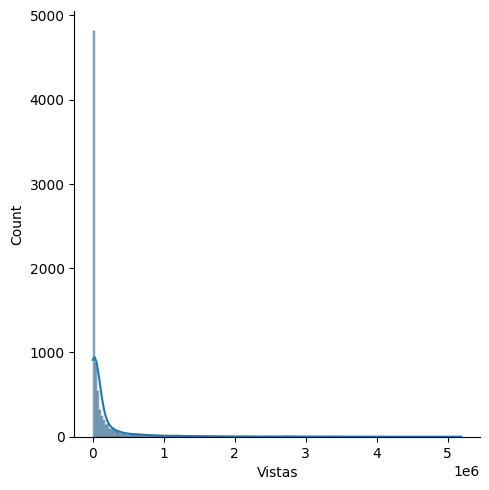

In [160]:
sns.displot(df['Vistas'], kde=True) 
sns.despine() 

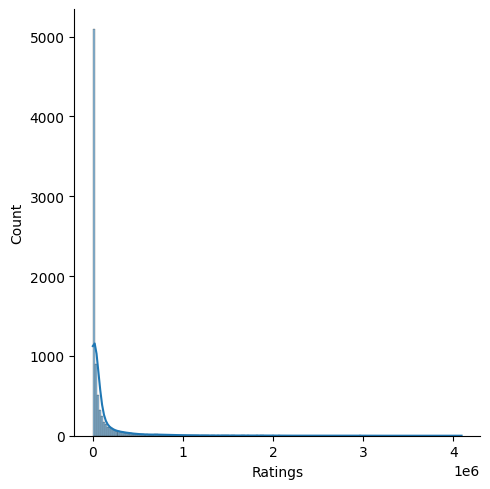

In [161]:
sns.displot(df['Ratings'], kde=True) 
sns.despine() 

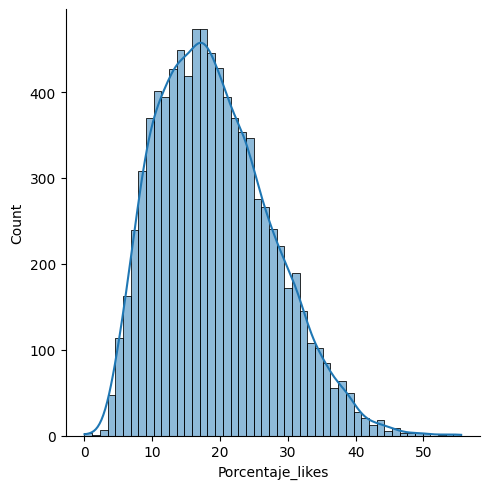

In [162]:
sns.displot(df['Porcentaje_likes'], kde=True) 
sns.despine() 

La columna Vistas, Ratings y Porcentaje_likes presentan sesgo por lo tanto utilizaremos el metodo de rango intercuartilico para detectar outliers

*Vistas*

In [163]:
Q1 = df['Vistas'].quantile(0.25)
Q3 = df['Vistas'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Vistas'] < limite_inferior) | (df['Vistas'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Vistas']])

Cantidad de outliers encontrados: 1254
       Vistas
1     2488721
3     1596190
4      873068
6      283873
7     3014320
...       ...
9933   367484
9934   304029
9967   328284
9968   697663
9978   889283

[1254 rows x 1 columns]


In [164]:
top10 = df.sort_values(by='Vistas', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
265                          Fight Club      David Fincher   
243                        Interstellar  Christopher Nolan   
7554                           Parasite       Bong Joon Ho   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
18                      The Truman Show         Peter Weir   
862                           Inception  Christopher Nolan   
1232                        Ratatouille          Brad Bird   
634                        Forrest Gump    Robert Zemeckis   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
265                    4.27            Drama     139.0      Germany  English   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los valores mas altos de Vistas vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esas visitas. Analizamos las 10 peliculas mas vistas y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

*Ratings*

In [165]:
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Ratings'] < limite_inferior) | (df['Ratings'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Ratings']])

Cantidad de outliers encontrados: 1243
      Ratings
1     1682389
3     1076949
4      600721
6      183927
7     1780203
...       ...
9933   316501
9934   262071
9967   243736
9968   633397
9978   782412

[1243 rows x 1 columns]


In [166]:
top10 = df.sort_values(by='Ratings', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9126  Everything Everywhere All at Once   Daniel Scheinert   
9825                        Oppenheimer  Christopher Nolan   
8943                               Dune   Denis Villeneuve   
21                             Whiplash    Damien Chazelle   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
7554                   4.55           Comedy     133.0  South Korea   Korean   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los outliers de la variable Ratings observamos que son las mismas peliculas que aparecieron con mas Vistas y Likes, por lo tanto también se conservaran estos valores 

*Porcentaje_likes*

In [167]:
Q1 = df['Porcentaje_likes'].quantile(0.25)
Q3 = df['Porcentaje_likes'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Porcentaje_likes'] < limite_inferior) | (df['Porcentaje_likes'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Porcentaje_likes']])

Cantidad de outliers encontrados: 57
      Porcentaje_likes
21           47.094243
80           46.531302
108          43.409498
243          47.909539
265          45.961517
280          44.596920
495          43.990640
587          43.317558
610          45.567265
884          44.253989
1531         43.919918
1791         43.324516
1891         43.684645
1920         45.474817
1923         45.384682
2158         45.144426
2185         52.279308
2577         43.334153
3158         45.359116
4156         42.723896
4218         44.018715
4373         42.630680
4375         44.145659
4399         43.840399
4690         42.492814
4747         43.877945
4871         42.888852
5654         49.241539
5811         43.063306
6024         42.812797
6720         50.358195
6759         45.283019
6985         43.442024
7018         50.000000
7106         43.893014
7332         45.662606
7554         54.452456
7567         47.235237
7673         43.746827
7943         43.589744
8393         43.7650

Cuando analizamos los outliers de la variable Porcentaje_likes observamos que son valores que podria tomar la variable si la pelicula le gusto a mas del 50% del público que la vio. Por lo tanto, se conservarán estos valores. 

**Selección de columnas para aplicar modelo de aprendisaje no supervisado**

In [168]:
df.dtypes

Titulo                    object
Director                  object
Calificación_promedio    float64
Genero                    object
Duración                 float64
Pais                      object
Lenguaje                  object
Descripción               object
Productora                object
Vistas                     int64
Ratings                    int64
Protagonista              object
Coprotagonista            object
Porcentaje_likes         float64
zscore                   float64
is_series                   bool
dtype: object

Eliminacion de columnas que no utilizaremos para la elaboracion del modelo no supervisado. Conservaremos las columnas numéricas y las categoricas que son de interes para nuestro analisis serán exploradas y transformadas con Get Dummies a continuación.

In [169]:
df = df.drop(columns=['Titulo', 'Descripción' , 'zscore' , 'is_series'])

In [170]:
#Corroboramos la eliminación
df.dtypes

Director                  object
Calificación_promedio    float64
Genero                    object
Duración                 float64
Pais                      object
Lenguaje                  object
Productora                object
Vistas                     int64
Ratings                    int64
Protagonista              object
Coprotagonista            object
Porcentaje_likes         float64
dtype: object

### Transformacion de datos categóricos One Hot Encoding

Debido a que las variables a transformar son categóricas y no tienen un orden predeterminado utilizaremos OneHotEncoding para las siguientes columnas: Director, Genero, Pais, Lenguaje, Productora, Protagonista, Coprotagonista.

Este proceso transforma cada categoría única dentro de esas columnas en una nueva columna binaria (0 o 1), permitiendo así que modelos de machine learning puedan trabajar con estos datos

In [171]:
# Especificamos las columnas categóricas que necesitamos transformar
columnas_categoricas = ['Director', 'Genero' , 'Pais' , 'Lenguaje', 'Productora', 'Protagonista' , 'Coprotagonista']  

# Aplicamos One Hot Encoding
df = pd.get_dummies(df, columns=columnas_categoricas)

# Convertír todas las columnas booleanas a enteros
df = df.astype(int)

# Vemos los resultados aplicados a las primeras filas 
print(df.head())

# Guardardamos el nuevo DataFrame a CSV
df.to_csv("Movie_Data_File_Codificado.csv", index=False)

   Calificación_promedio  Duración   Vistas  Ratings  Porcentaje_likes  \
0                      3        92    12841     9042                29   
1                      4       121  2488721  1682389                37   
3                      3       102  1596190  1076949                30   
4                      4       124   873068   600721                39   
6                      3       100   283873   183927                30   

   Director_  Director_A.V. Rockwell  Director_Aaron B. Koontz  \
0          0                       0                         0   
1          0                       0                         0   
3          0                       0                         0   
4          0                       0                         0   
6          0                       0                         0   

   Director_Aaron Blaise  Director_Aaron Hann  ...  \
0                      0                    0  ...   
1                      0                    0  ...

### Modelos de aprendizaje no supervisado

**Instalacion de librerias y carga del dataset**

In [172]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [173]:
#Carga del dataset
df = pd.read_csv('Movie_Data_File_Codificado.csv')

MemoryError: Unable to allocate 1.20 GiB for an array with shape (18570, 8704) and data type int64

In [ ]:
df.dtypes

Calificación_promedio           int64
Duración                        int64
Vistas                          int64
Ratings                         int64
Porcentaje_likes                int64
                                ...  
Coprotagonista_Édith Scob       int64
Coprotagonista_Éric Cantona     int64
Coprotagonista_Ériq Ebouaney    int64
Coprotagonista_Óscar Jaenada    int64
Coprotagonista_Ørjan Gamst      int64
Length: 18570, dtype: object

## Clustering

**Kmeans**

*Métrica: Elbow*

Comenzaremos aplicando el metodo Elbow para encontrar el número optimo de Clusters. A partir de dicho valor, aplicaremos kmeans

In [ ]:
#Nos aseguramos de utilizar solo columnas numéricos
df_cluster= df.select_dtypes(include='number').copy()

In [ ]:
#Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

In [ ]:
# Aplicamos método Elbow para encontrar el mejor número de clusters
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


In [ ]:
# Utilizamos KneeLocator para encontrar el k óptimo
kneedle = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
k_optimo = kneedle.knee

Advertencia: No se pudo determinar un k óptimo. La línea vertical no se graficará.


C:\Users\mkorb\AppData\Local\Temp\ipykernel_36948\1651101449.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


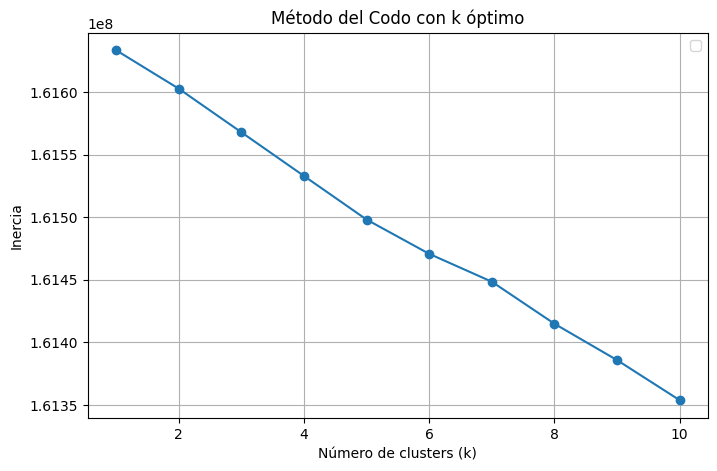

El número óptimo de clusters es: None


In [ ]:
# Gráficamos para obseravr el k óptimo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
if k_optimo is not None:
    plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
else:
    print("Advertencia: No se pudo determinar un k óptimo. La línea vertical no se graficará.")
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con k óptimo')
plt.legend()
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters es: {k_optimo}")

El modelo Elbow no detecta el valor de k óptimo por este motivo da una advertencia. 

Debido a que no se observó un codo claramente, incluso la función arroja error, y tampoco pudimos encontrarlo de forma analítica, aplicamos a continuación tres opciones:**1)** Utilizaremos Silhouette Score en vez de Elbow, **2)** Realizaremos PCA antes de aplicar Elbow, **3)** Ampliaremos el rango.

**OPCION 1: Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
silhouettes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouettes.append(score)

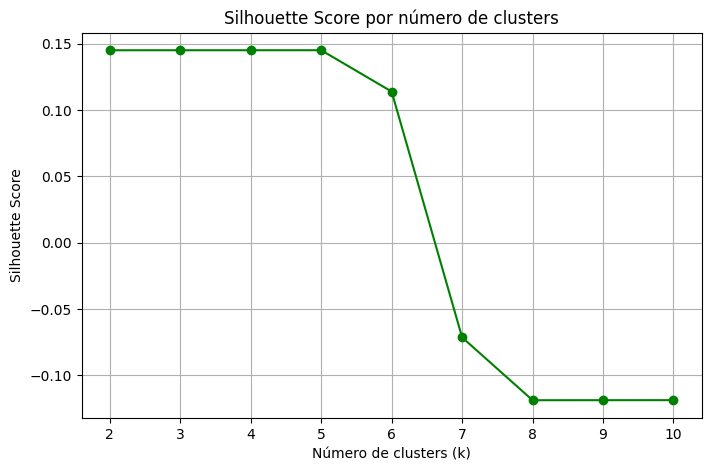

In [ ]:
#Graficamos
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouettes, marker='o', color='green')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score por número de clusters")
plt.grid(True)
plt.show()

In [ ]:
# Elegimos el k con mayor score
k_optimo = range(2, 11)[silhouettes.index(max(silhouettes))]
print(f"El mejor k según Silhouette Score es: {k_optimo}")

El mejor k según Silhouette Score es: 5


**OPCION 2: PCA y luego Elbow**

*PCA*

Elejimos automáticamente cuántos componentes PCA conservar para explicar al menos el 90% de la varianza total.

In [ ]:
def elegir_n_componentes_pca(X, varianza_objetivo=0.90):
    
    # PCA sin reducir aún
    pca_temp = PCA()
    pca_temp.fit(X)

    # Calculamos varianza acumulada
    varianza_acumulada = np.cumsum(pca_temp.explained_variance_ratio_)

    # Encontramos el mínimo número de componentes que cumple el objetivo
    n_componentes = np.argmax(varianza_acumulada >= varianza_objetivo) + 1

In [ ]:
n_comp = elegir_n_componentes_pca(X_scaled)
print(f"Componentes seleccionados: {n_comp}")

MemoryError: Unable to allocate 578. MiB for an array with shape (8704, 8704) and data type float64

Debido a que el resultado es muy elevado, utilizaremos un gráfico para ver cuánta varianza se explica con menos componentes. Nos permitirá visualizar si necesitamos realmente 5915 o si con menor cantidad de componentes explicariamos aproximadamente el 90%.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)

var_acum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(var_acum, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Varianza explicada por PCA")
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de varianza')
plt.legend()
plt.show()

MemoryError: Unable to allocate 1.20 GiB for an array with shape (8704, 18570) and data type float64

En el gráfico se observa claramente que necesitamos una gran cantidad de componenetes para explicar el 90% de la varianza y que por la forma de la curva una disminución de los componentes implica una disminución importante en la varianza explicada. Esto se debe a que aplicamos One hot encoding y cada categoría nueva crea una columna. Numerosas columnas categóricas con alta cardinalidad originan muchas con información redundante o casi nula.

Debido a esto realizaremos elección y la carga manual de los componentes.

Reducción de dimensionalidad con PCA:

In [ ]:
# Los datos ya estan escalados por lo tanto reducimos dimensionalidad con PCA. Definimos trabajar con 2 componentes.
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Filtramos todas las variables numéricas (incluidas las dummies)
df_clusters = df.select_dtypes(include='number').copy()

# Excluimos la columna 'Cluster' si existe debido al analisis previo de Kmeans
if 'Cluster' in df.columns:
    df_clusters = df.drop(columns=['Cluster'])

In [ ]:
#Corroboramos la eliminacion de la variable 'Cluster'
print(f"Shape de componentes: {pca.components_.shape}")        
print(f"Cantidad de variables: {len(df_clusters.columns)}")  

Shape de componentes: (2, 18570)
Cantidad de variables: 18570


Grafico:


Se construye un nuevo DataFrame con las dos primeras componentes principales (PCA1 y PCA2), que permiten visualizar los datos en 2D.
Además, se incluye la columna Cluster, asignada previamente por el modelo GMM o KMeans, lo que facilita la visualización de los grupos formados.

In [ ]:
#Creamos un DataFrame para graficar
df_plot = pd.DataFrame()
df_plot['PCA1'] = X_pca[:, 0]
df_plot['PCA2'] = X_pca[:, 1]
df_plot['Cluster'] = clusters

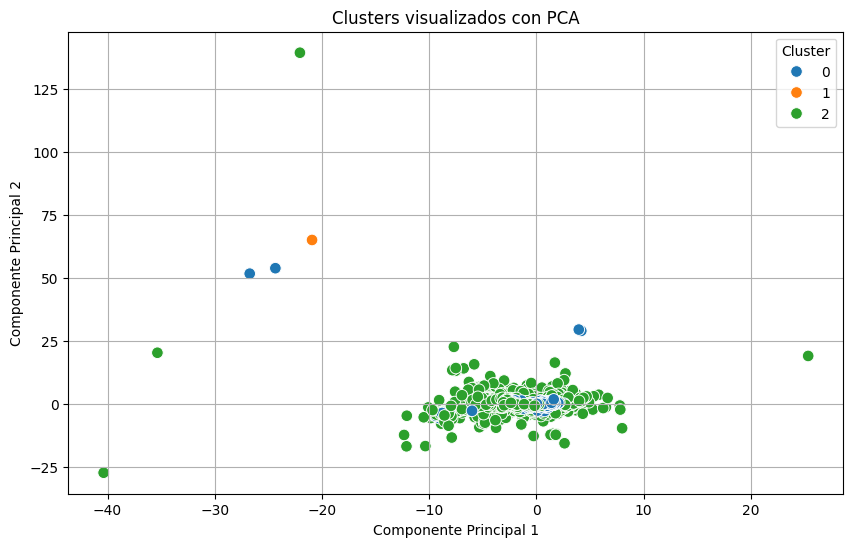

In [ ]:
#Graficamos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=70)
plt.title(f'Clusters visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Análisis de cargas de los componentes principales: 
Este análisis permite interpretar qué variables están detrás de los agrupamientos visualizados en el plano PCA.

In [ ]:
#Observamos la contribución (o "peso") de cada variable en cada componente
componentes = pd.DataFrame(pca.components_, columns=df_clusters.columns, index=['PCA1', 'PCA2'])
print(componentes.T)

                                  PCA1      PCA2
Calificación_promedio        -0.084519 -0.002657
Duración                     -0.026354 -0.003715
Vistas                        0.052108  0.010752
Ratings                       0.047126  0.010844
Porcentaje_likes             -0.071137  0.002859
...                                ...       ...
Coprotagonista_Édith Scob    -0.006217 -0.001812
Coprotagonista_Éric Cantona  -0.006452 -0.008349
Coprotagonista_Ériq Ebouaney -0.002480  0.006148
Coprotagonista_Óscar Jaenada  0.001448  0.000157
Coprotagonista_Ørjan Gamst   -0.006134 -0.002506

[18570 rows x 2 columns]


Interpretación de cargas relevantes:

Esto es esencial para dar sentido a los agrupamientos obtenidos por clustering y para saber si los componentes están reflejando, por ejemplo, diferencias por cantidad de vistas, duración, idioma, actores frecuentes, etc.


In [ ]:
cargas = pd.DataFrame(pca.components_, columns=df_clusters.columns)

print("Cargas PCA para cada componente:")
print(cargas)

Cargas PCA para cada componente:
   Calificación_promedio  Duración    Vistas   Ratings  Porcentaje_likes  \
0              -0.084519 -0.026354  0.052108  0.047126         -0.071137   
1              -0.002657 -0.003715  0.010752  0.010844          0.002859   

   Director_  Director_A.V. Rockwell  Director_Aaron B. Koontz  \
0   0.005542                0.001092                  0.003221   
1  -0.000155               -0.001611                 -0.001188   

   Director_Aaron Blaise  Director_Aaron Hann  ...  \
0               0.002237             0.000709  ...   
1               0.000484             0.000784  ...   

   Coprotagonista_Zoë Kravitz  Coprotagonista_Zuleikha Robinson  \
0                    0.003566                          0.001806   
1                    0.001156                         -0.000154   

   Coprotagonista_nan  Coprotagonista_Álvaro Guevara  \
0            0.009593                      -0.007006   
1           -0.004160                       0.001402   

   Co

En este caso, variables como 'Vistas', 'Ratings' o ciertos actores/directores frecuentes son los que más influyen en la separación de los clústeres en el plano PCA.

A continuacion usamos el metodo Elbow para encontrar el número óptimo de clústeres (k) antes de aplicar KMeans.

Aplicamos método Elbow luego de aplicar PCA

In [ ]:

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

In [ ]:
# Aplicamos KneeLocator para detectar el codo
kneedle = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
k_optimo = kneedle.knee

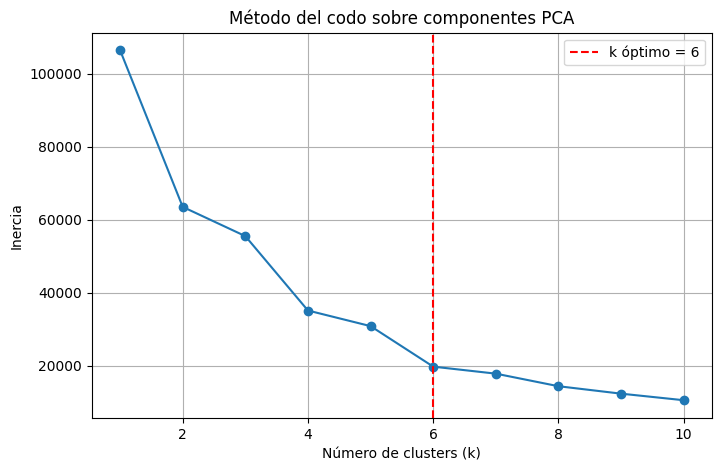

El número óptimo de clusters detectado es: 6


In [ ]:
#Graficamos con k_optimo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo sobre componentes PCA')
plt.legend()
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters detectado es: {k_optimo}")

**OPCIÓN 3: Cambio de rango de k**

In [ ]:
# Aplicamos método Elbow para encontrar el mejor número de clusters cambiando el rango
inertias = []
K_range = range(1, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

In [ ]:
# Utilizamos KneeLocator para encontrar el k óptimo
kneedle = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
k_optimo = kneedle.knee

TypeError: '>' not supported between instances of 'float' and 'NoneType'

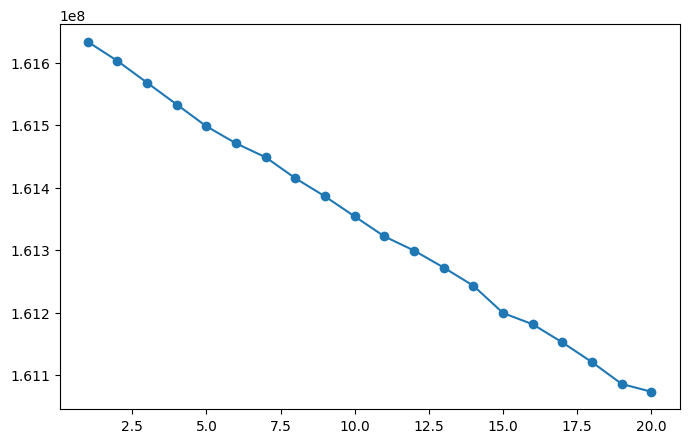

In [ ]:

# Gráficamos para obseravr el k óptimo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con k óptimo')
plt.legend()
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters es: {k_optimo}")

Realizando cambio de rango no se identifica un valor de k óptimo, por lo tanto a continuación realizaremos KMeans con los valores de k obtenidos en las Opciones 1 y 2. 

*Aplicación de Kmeans*

In [ ]:
# Aplicamos KMeans (k=5, obtenido con Slihouette)
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
#Agregamos cluster al DataFrame original
df_clusters = df.copy()
df_clusters ['Cluster'] = clusters

In [ ]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster'].value_counts())
    
print("\nCentroides de los clusters (en escala):")
print(kmeans.cluster_centers_)


Cantidad de elementos por cluster:
Cluster
0    8700
2       1
3       1
1       1
4       1
Name: count, dtype: int64

Centroides de los clusters (en escala):
[[ 2.21097389e-04  1.39813591e-04  1.66478715e-04 ...  4.92840338e-06
   4.92840338e-06  4.92840338e-06]
 [-1.32749663e+00 -5.67103303e-01 -3.70890465e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 [ 3.65722987e-01 -3.24326002e-01 -3.64060600e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 [ 3.65722987e-01  8.03028318e-02 -3.59843443e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 [-1.32749663e+00 -4.05251769e-01 -3.53570312e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]]


El resumen indica que Cluster 0 contiene casi todos los datos (8700).

Los otros 5 clústeres contienen solo un elemento cada uno.
Este patrón indica que KMeans no logró encontrar una separación real entre grupos y probablemente los datos fueron dominados por una gran masa compacta con muy poca variación fuera de esa región O los datos tienen valores extremos (outliers) que terminan aislándose como clústeres individuales.

C:\Users\mkorb\AppData\Local\Temp\ipykernel_31524\2987498290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


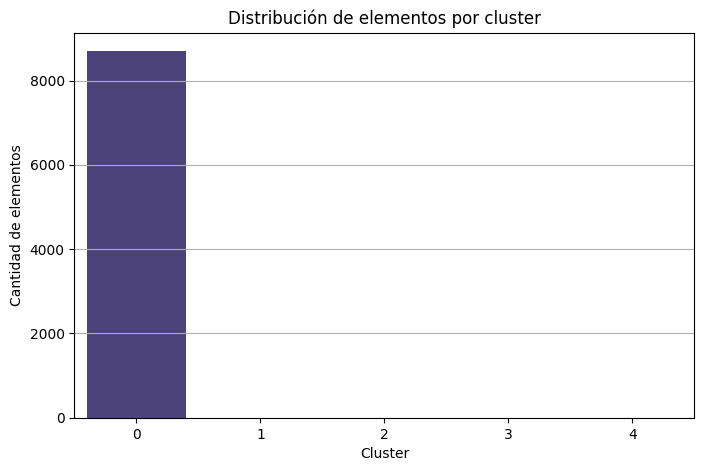

In [ ]:
#Contamos cuántos elementos hay en cada cluster
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()

# Creamos el gráfico de barras para observar la distribución de elementos por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Cantidad de elementos')
plt.title('Distribución de elementos por cluster')
plt.grid(True, axis='y')
plt.show()

Se observa un desbalance importante en la cantidad de datos por clusters con k=5

In [ ]:
# Aplicamos KMeans (k=3, obtenido con Elbow luwgo de PCA con parámetros optimizados)
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
#Agregamos cluster al DataFrame original
df_clusters= df.copy()
df_clusters['Cluster'] = clusters

In [ ]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster'].value_counts())
    
print("\nCentroides de los clusters (en escala):")
print(kmeans.cluster_centers_)


Cantidad de elementos por cluster:
Cluster
0    8702
2       1
1       1
Name: count, dtype: int64

Centroides de los clusters (en escala):
[[ 1.10523287e-04  1.02439589e-04  8.44577183e-05 ...  2.46363534e-06
   2.46363534e-06  2.46363534e-06]
 [-1.32749663e+00 -5.67103303e-01 -3.70890465e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 [ 3.65722987e-01 -3.24326002e-01 -3.64060600e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]]


C:\Users\mkorb\AppData\Local\Temp\ipykernel_31524\2987498290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


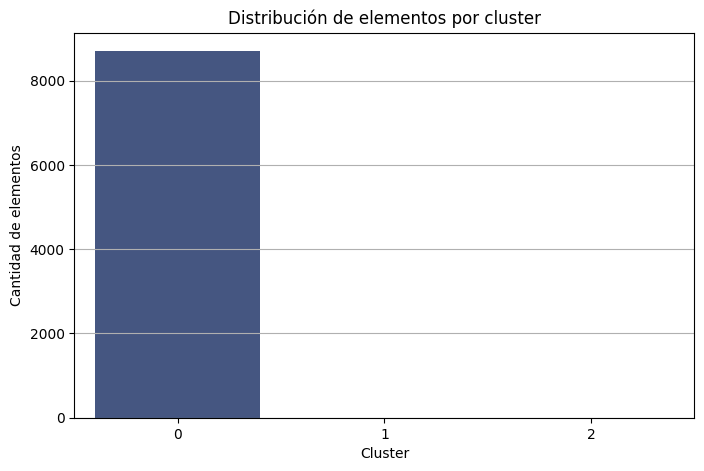

In [ ]:
#Contamos cuántos elementos hay en cada cluster
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()

# Creamos el gráfico de barras para observar la distribución de elementos por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Cantidad de elementos')
plt.title('Distribución de elementos por cluster')
plt.grid(True, axis='y')
plt.show()

 En los dos casos se observa un importante desbalance en la cantidad de datos que integran los clusters. Puede estar sucediendo que debido a que el dataframe presentaba outliers, que fueron conservados por no pertenecer a errores de registro, kmeans es sensible a ellos y no sería el método más apto para la formación de Clusters.

Debido a que nuestros datos siguen desbalanceados a continuación utilizaremos DBSCAN

**DBSCAN**

Aplicaremos DBSCAN sobre PCA

In [ ]:
#Importamos libreria
from sklearn.cluster import DBSCAN

In [ ]:
#Aplicamos DBSCAN con PCA previamente realizado
dbscan = DBSCAN(eps=1.5, min_samples=5)  
clusters = dbscan.fit_predict(X_pca)

In [ ]:
#Agregamos clusters al DataFrame
df_clusters = df.copy()
df_clusters['Cluster'] = clusters

In [ ]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster'].value_counts())


Cantidad de elementos por cluster:
Cluster
 0    8665
-1      34
 1       5
Name: count, dtype: int64


DBSCAN permitió identificar una estructura más realista en los datos reducidos con PCA, detectando un clúster principal con 8665 películas, un pequeño grupo de 5 películas con características particulares, y 34 casos que fueron clasificados outliers. DBSCAN se adaptó mejor a la distribución natural de los datos y logró una agrupación más coherente sin necesidad de definir el número de clústeres previamente.

C:\Users\mkorb\AppData\Local\Temp\ipykernel_31524\176014760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_clusters, palette='Set2')


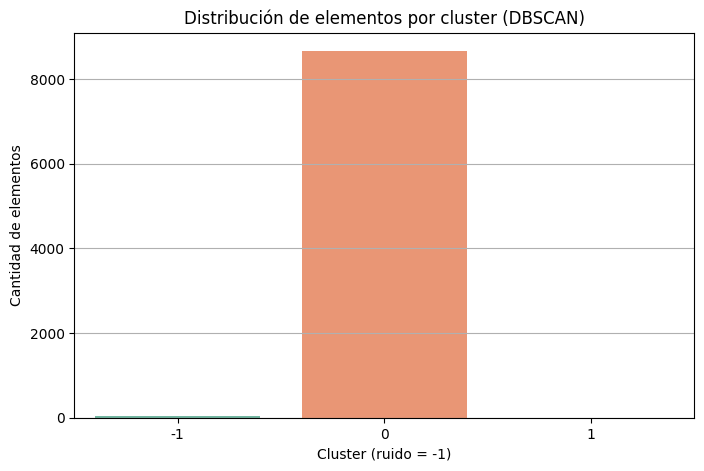

In [ ]:
# Graficamos distribución de clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_clusters, palette='Set2')
plt.title("Distribución de elementos por cluster (DBSCAN)")
plt.xlabel("Cluster (ruido = -1)")
plt.ylabel("Cantidad de elementos")
plt.grid(True, axis='y')
plt.show()

In [ ]:
# Armamos dataframe para graficar
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters

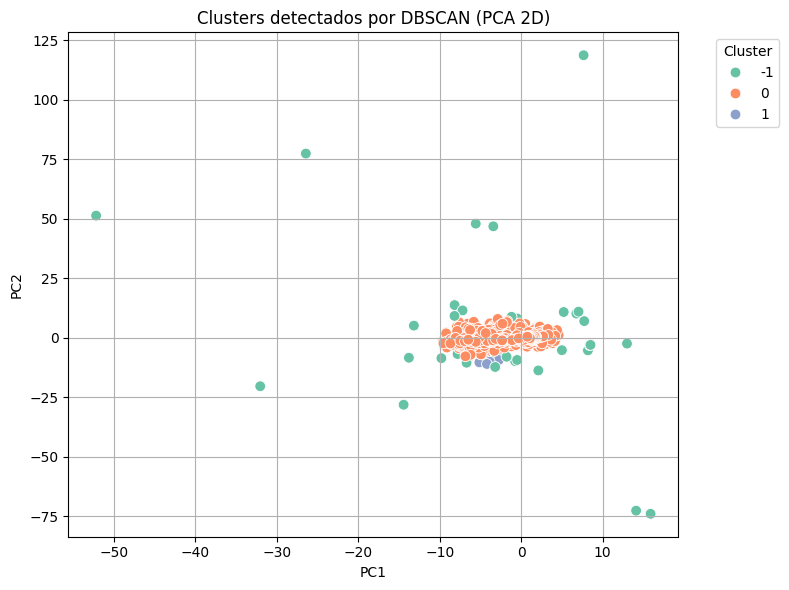

In [ ]:
# Gráficamos
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    data=df_plot,
    legend='full',
    s=60
)
plt.title('Clusters detectados por DBSCAN (PCA 2D)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Debido a que los datos por clusters estan desbalanceados y no se observa una separación clara de clusters, optimizaremos los parámetros Eps y Min-samples

**Min-samples** : utilizaremos 3 ya que contamos con PCA reducido a 2 componentes

**Eps**

Realizaremos los analisis para encontrar un buen valor para el parámetro eps, uitlizaremos el metodo gráfico de k-distancia y KneeLocator

*k-distancia*:

In [ ]:
from sklearn.neighbors import NearestNeighbors

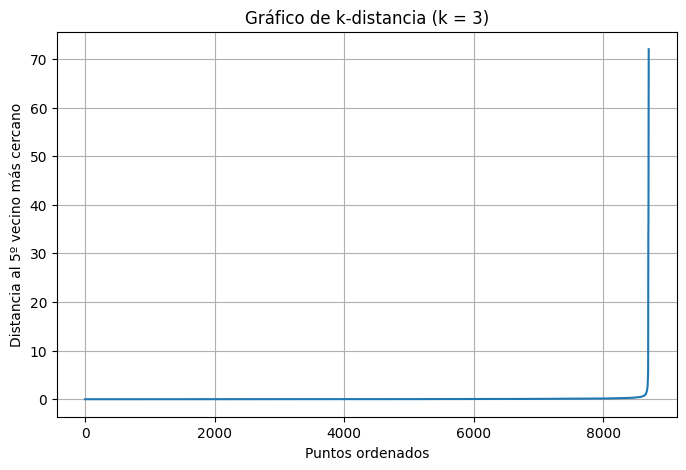

In [ ]:
X = X_pca

# Usamos min_samples como número de vecinos 
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Tomamos la distancia al k-ésimo vecino más cercano (última columna)
k_distances = np.sort(distances[:, 2])  # índice 2 porque usamos n_neighbors=3

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title("Gráfico de k-distancia (k = 3)")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5º vecino más cercano")
plt.grid(True)
plt.show()

*KneeLocator*

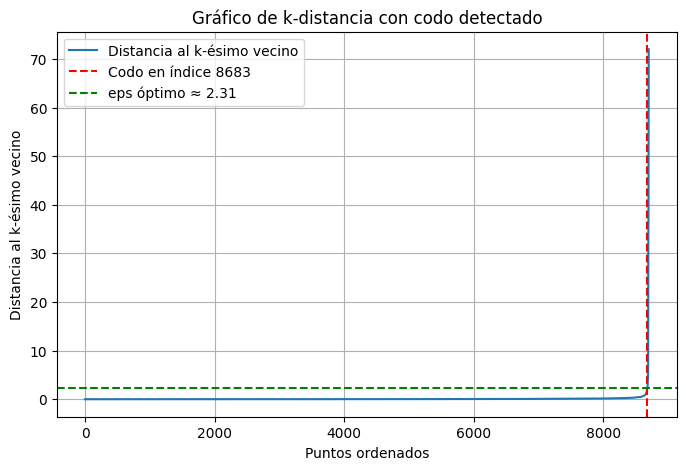

Eps óptimo sugerido para DBSCAN: 2.31


In [ ]:
X = X_pca

# Elegimos el número de vecinos 
k = 3
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenamos las distancias al k-ésimo vecino más cercano
k_distances = np.sort(distances[:, 2])

# Detectamos el codo con KneeLocator
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
eps_optimo = kneedle.knee_y  # valor óptimo de eps
indice_codo = kneedle.knee   # posición del codo en el eje X

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(k_distances, label='Distancia al k-ésimo vecino')
plt.axvline(x=indice_codo, color='red', linestyle='--', label=f'Codo en índice {indice_codo}')
plt.axhline(y=eps_optimo, color='green', linestyle='--', label=f'eps óptimo ≈ {eps_optimo:.2f}')
plt.title("Gráfico de k-distancia con codo detectado")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al k-ésimo vecino")
plt.legend()
plt.grid(True)
plt.show()

print(f"Eps óptimo sugerido para DBSCAN: {eps_optimo:.2f}")

In [ ]:
#DBSCAN con eps=0,99
dbscan = DBSCAN(eps=0.99, min_samples=3)
clusters = dbscan.fit_predict(X)

In [ ]:
#Agregamos los clusters al dataset
df_dbscan = df.copy()
df_dbscan['Cluster'] = clusters

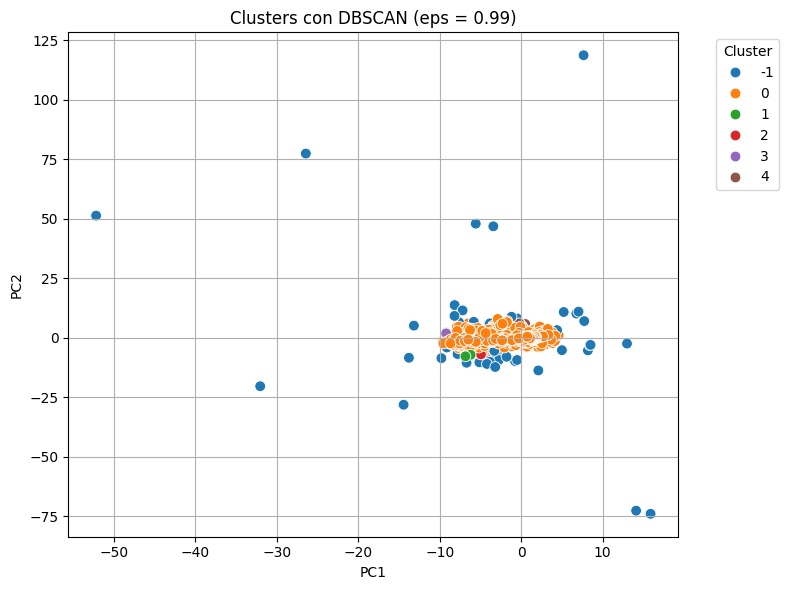

In [ ]:
#Visualizamos los clusters
df_plot = pd.DataFrame(X, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('Clusters con DBSCAN (eps = 0.99)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster'].value_counts())


Cantidad de elementos por cluster:
Cluster
 0    8665
-1      34
 1       5
Name: count, dtype: int64


Los clusters continuan desbalanceados.

A continuación probaremos con otro modelo de aprendizaje no supervizado que procesa los outliers de manera diferente a KMeans y DBSCAN

**Gaussian Mixture Models (GMM)** 

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# Aplicamos PCA con el número de componentes.
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

In [ ]:
#Número de clusters a probar, en este caso elegimos 3
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(X_pca)  

In [ ]:
#Agregamos los cluster al dataframe
df_gmm = df.copy()
df_gmm['Cluster'] = clusters

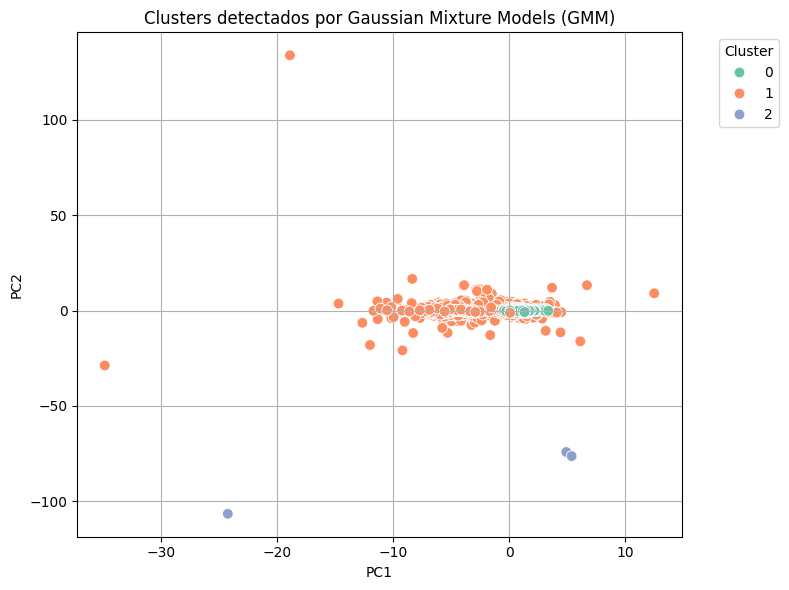

In [ ]:
#Graficamos los clusters
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('Clusters detectados por Gaussian Mixture Models (GMM)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Aplicamos las metricas al modelo
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Métricas de clustering:")
print(f"Silhouette Score: {silhouette_score(X_pca, clusters):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_pca, clusters):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_pca, clusters):.3f}")

Métricas de clustering:
Silhouette Score: 0.646
Davies-Bouldin Index: 0.602
Calinski-Harabasz Score: 4686.565


El valor de Silhouette (0.646) indica que el clustering tiene una buena separación entre los clusters y coherencia interna. Es un valor sólido, especialmente para datos reales, lo que sugiere que los puntos están bien agrupados y no hay mucho solapamiento.

El Davies-Bouldin Index (0.602) es bajo, lo cual es muy bueno. Significa que los clusters son compactos y están claramente separados entre sí, con muy poco solapamiento.

El Calinski-Harabasz Score (4686.565) es alto, lo que refuerza la idea de que los clusters están bien definidos y distribuidos de forma dispersa entre ellos en el espacio multidimensional.


Esto te permite ver para cada película (o fila) qué tan seguro está el modelo de asignarla a cada grupo. ver codigo

Dado que este analisis se adapta mejor a nuetro dataset ajustaremos los parametros de PCA para luego encontrar el mejor parámetro n-components de GMM

*n_componentes (PCA)*: por lo visto anteriormente elegiremos 2

*n_componenetes GMM:* número de clusters

Con el valor de PCA=2 optimizaremos el número de cluesters

In [ ]:
def evaluar_gmm_n_components(X, k_min=2, k_max=10):
    resultados = []

    for k in range(k_min, k_max + 1):
        gmm = GaussianMixture(n_components=2, random_state=42)
        labels = gmm.fit_predict(X)

        if len(set(labels)) > 1:
            sil_score = silhouette_score(X, labels)
        else:
            sil_score = np.nan

        resultados.append({
            'n_components': k,
            'Silhouette': sil_score,
            'BIC': gmm.bic(X),
            'AIC': gmm.aic(X)
        })

    df_resultados = pd.DataFrame(resultados)

    if df_resultados['Silhouette'].notnull().any():
        mejor_k = df_resultados.loc[df_resultados['Silhouette'].idxmax(), 'n_components']
        print(f"Mejor número de clusters según Silhouette Score: {mejor_k}")
    else:
        print("No se pudieron calcular valores válidos de Silhouette Score.")
        mejor_k = None

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(df_resultados['n_components'], df_resultados['Silhouette'], marker='o')
    plt.xlabel('Número de clusters (GMM)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs número de clusters')
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(df_resultados['n_components'], df_resultados['BIC'], marker='o', label='BIC')
    plt.plot(df_resultados['n_components'], df_resultados['AIC'], marker='o', label='AIC')
    plt.xlabel('Número de clusters (GMM)')
    plt.ylabel('Valor')
    plt.title('BIC y AIC vs número de clusters')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print (mejor_k)
    return df_resultados, mejor_k

Mejor número de clusters según Silhouette Score: 2


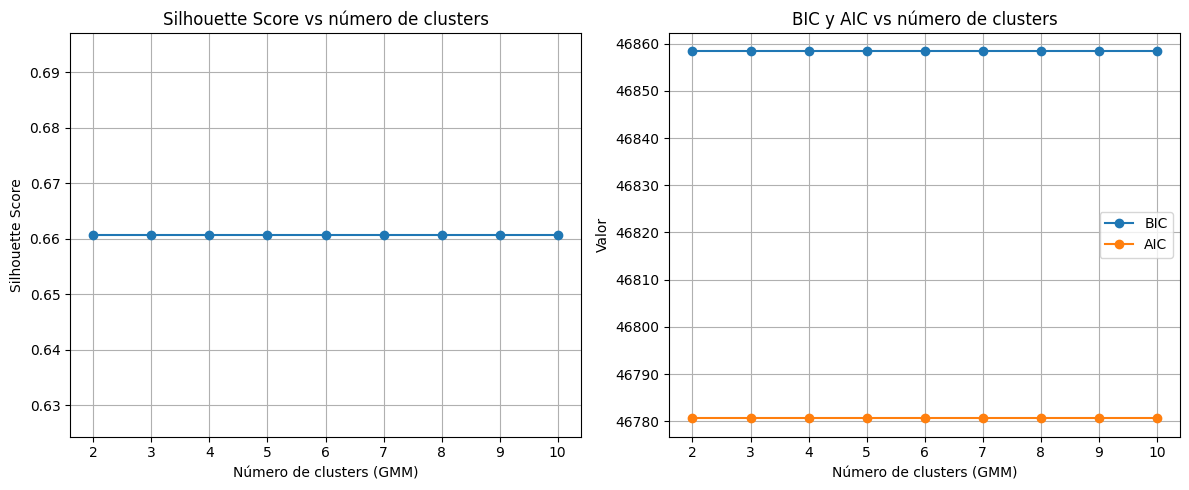

2
2


In [ ]:
df_resultados, mejor_k = evaluar_gmm_n_components(X_pca)
print(mejor_k) 

El número de clusters óptimo para aplicar GMM es 2.

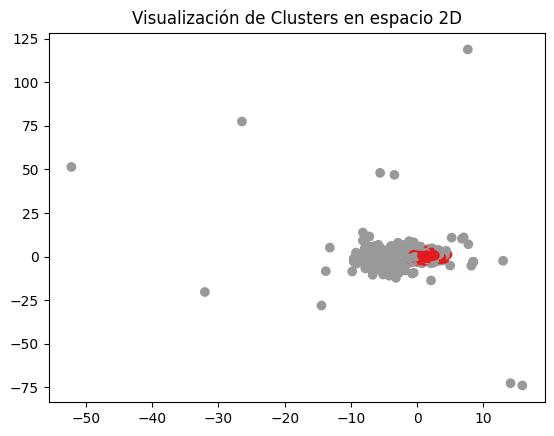

In [ ]:
#Visualizamos los clusters en 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

gmm = GaussianMixture(n_components=mejor_k)
labels = gmm.fit_predict(X_pca)

plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='Set1')
plt.title('Visualización de Clusters en espacio 2D')
plt.show()

Con los valores optimizados de n-componentes para PCA y de n-componentes (clusters) aplicamos nuevamente GMM

In [ ]:
#Número de clusters a probar 
gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(X_pca)  

In [ ]:
#Agregamos los cluster al dataframe
df_gmm = df.copy()
df_gmm['Cluster'] = clusters

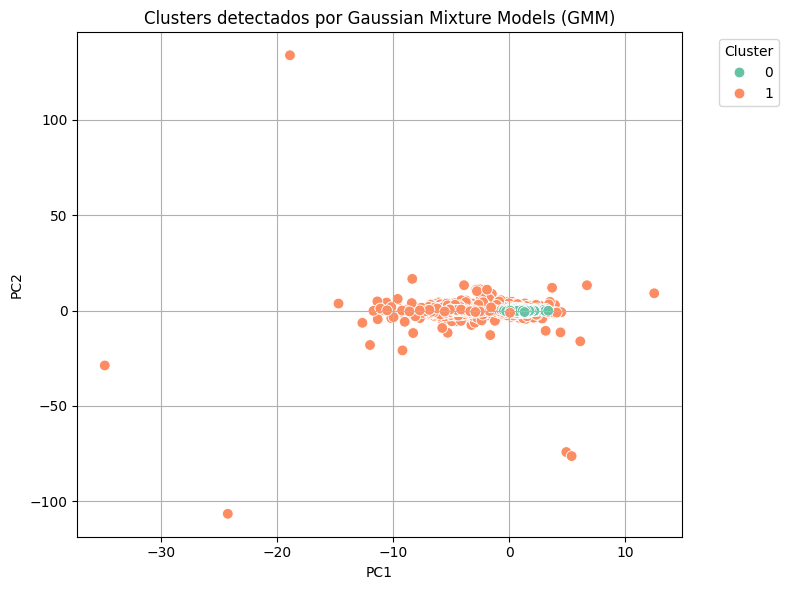

In [ ]:
#Graficamos los clusters
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('Clusters detectados por Gaussian Mixture Models (GMM)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Analizamos la distribución de los clusters

In [ ]:
# Convertimos a Series y contamos
serie = pd.Series(labels, name="Cluster")
conteos = serie.value_counts()
porcentajes = serie.value_counts(normalize=True) * 100

# Construimos un DataFrame con ambos
df_dist = pd.DataFrame({
    'Cluster': conteos.index,
    'Count': conteos.values,
    'Percent': porcentajes.values
})

# Ajustamos formato
df_dist['Percent'] = df_dist['Percent'].round(2).astype(str) + '%'

# Ordenamos por Count descendente
df_dist = df_dist.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Mostramos el resultado
print(df_dist)

   Cluster  Count Percent
0        0   6387  73.38%
1        1   2317  26.62%


Se observan dos clusters, el cluster 0 en que se encuentran la mayoria de los datos y el cluster 1 que contiene un subgrupo con diferencias claras respecto a la mayoria. Tienen cierto desbalance, pero no es extremo. El desbalance puede deberse a que el grupo minoritario corresponda a películas muy taquilleras.

In [ ]:
#Aplicamos las metricas al modelo
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Métricas de clustering:")
print(f"Silhouette Score: {silhouette_score(X_pca, clusters):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_pca, clusters):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_pca, clusters):.3f}")

Métricas de clustering:
Silhouette Score: 0.661
Davies-Bouldin Index: 0.764
Calinski-Harabasz Score: 4197.081


El Silhouette Score de 0.661 indica una excelente separación entre los clusters, ya que valores superiores a 0.5 reflejan grupos bien definidos y cohesionados internamente.

El Davies–Bouldin Index de 0.764 es muy bajo (idealmente < 1), lo cual confirma que los clusters son compactos y están bien separados entre sí, con mínimo solapamiento.

El Calinski–Harabasz Score de 4197.081 es muy alto, lo que refuerza que la dispersión entre clusters es grande comparada con su cohesión.

📊 Suma por cluster:


,Calificación_promedio,Duración,Vistas,Ratings,Porcentaje_likes,Director_,Director_A.V. Rockwell,Director_Aaron B. Koontz,Director_Aaron Blaise,Director_Aaron Hann,...,Coprotagonista_Zoë Kravitz,Coprotagonista_Zuleikha Robinson,Coprotagonista_nan,Coprotagonista_Álvaro Guevara,Coprotagonista_Ángel Aranda,Coprotagonista_Édith Scob,Coprotagonista_Éric Cantona,Coprotagonista_Ériq Ebouaney,Coprotagonista_Óscar Jaenada,Coprotagonista_Ørjan Gamst
Cluster,,,,,,,,,,,,,,,,,,,,,
0,17429,649039,1350519682,835023717,114383,6,1,1,1,0,...,1,1,53,0,0,0,0,0,1,0
1,6803,230199,137167391,95000209,48603,0,0,0,0,1,...,0,0,21,1,1,1,1,1,0,1


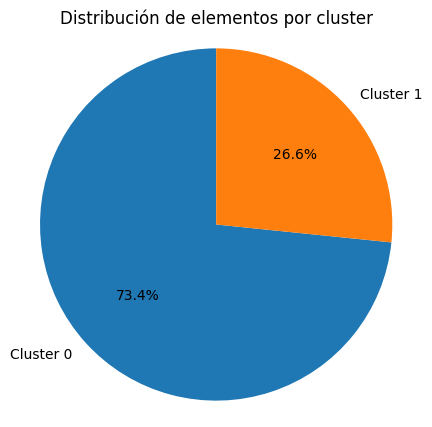

NameError: name 'df_encoded' is not defined

In [ ]:


# 1. Asignamos las etiquetas de los clusters al DataFrame original
df["Cluster"] = labels  # labels es la salida de tu modelo de clustering (KMeans, GMM, etc.)

# 2. Suma por cluster
suma_por_cluster = df.groupby("Cluster").sum(numeric_only=True)
print("📊 Suma por cluster:")
display(suma_por_cluster)

# 3. Conteo de elementos por cluster
counts = df["Cluster"].value_counts().sort_index()
unique = counts.index

# 4. Pie chart - proporción por cluster
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=[f"Cluster {i}" for i in unique], autopct='%1.1f%%', startangle=90)
plt.title("Distribución de elementos por cluster")
plt.axis('equal')
plt.show()

# 5. Guardamos las columnas originales del dataset antes del PCA
# Esto debe ejecutarse ANTES de aplicar PCA, justo después del one-hot encoding
# Si ya tenés PCA entrenado, asegurate de usar la misma variable usada para fit
columnas_originales = df_encoded.columns  # df_encoded es el dataframe que se usó para fit_transform del PCA

# 6. Creamos DataFrame con los componentes del PCA
componentes = pd.DataFrame(
    pca.components_,
    columns=columnas_originales,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# 7. Mostramos las variables más importantes para el primer componente principal
print("💡 Variables más importantes en PC1:")
display(componentes.T.sort_values("PC1", ascending=False).head(10))

# 8. Media por cluster (perfil promedio)
media_por_cluster = df.groupby("Cluster").mean(numeric_only=True)
print("📈 Perfil promedio por cluster:")
display(media_por_cluster)


El error se debe al gran número de columnas que generó el Hot Encoding

In [ ]:
#Guardamos el modelo y los resultados
df["Cluster"] = labels
df.to_csv("resultado_clusters.csv", index=False)

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # si guardaste el PCA en gmm_pca
    index=df_cluster.columns, 
    columns=[f"PC{i+1}" for i in range(pca.n_components)]
)
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

Lenguaje_English         0.339957
Pais_USA                 0.227316
Lenguaje_Japanese        0.154047
Pais_Japan               0.147862
Lenguaje_Italian         0.140915
Pais_Italy               0.114404
Lenguaje_French          0.101261
Calificación_promedio    0.096661
Lenguaje_Korean          0.094425
Pais_France              0.094266
Name: PC1, dtype: float64


PC1 parece representar una dimensión cultural y de mercado dominante, donde las películas de habla inglesa o de países con alta producción cinematográfica (EE.UU., Japón, Italia) tienen más peso. Además, PC1 está asociada a popularidad o visibilidad internacional (vistas, ratings altos), con fuerte presencia de idiomas globales.

In [ ]:
# 1. Creamos un DataFrame que incluya la columna de cluster
df_insights = df.copy()
df_insights['Cluster'] = labels  

# 2. Definimos qué variables queremos resumir
#    – Numéricas
#    – Dummies de Género: porcentaje de presencia por cluster

numeric_vars = ['Calificación_promedio', 'Duración' , 'Vistas' , 'Ratings' ,  'Porcentaje_likes'] 
genero_dummies = [col for col in df_insights.columns if col.startswith('Genero_')]

# 3. Agregamos al resumen el promedio de las numéricas y el promedio de las dummies (que equivale al % de ejemplares con esa categoría)
agg_dict = {var: 'mean' for var in numeric_vars + genero_dummies}

resumen = df_insights.groupby('Cluster').agg(agg_dict)

# 4. Formateamos porcentajes para los géneros
for col in genero_dummies:
    resumen[col] = (resumen[col] * 100).round(1).astype(str) + '%'

# 5. Renombramos columnas para mayor claridad
resumen = resumen.rename(columns={g: g.replace('Genero_', '') + ' (%)' for g in genero_dummies})


# 6. Mostramos el resultado
print(resumen)

         Calificación_promedio    Duración         Vistas        Ratings  \
Cluster                                                                    
0                     2.728824  101.618757  211448.204478  130738.017379   
1                     2.936124   99.352180   59200.427708   41001.384981   

         Porcentaje_likes Action (%) Adventure (%) Animation (%) Comedy (%)  \
Cluster                                                                       
0               17.908721       7.2%          4.7%          2.1%      16.1%   
1               20.976694       8.2%          3.3%          3.1%       8.1%   

        Crime (%)  ... History (%) Horror (%) Music (%) Mystery (%)  \
Cluster            ...                                                
0            5.3%  ...        1.6%       7.8%      1.3%        2.5%   
1            4.6%  ...        1.9%      10.9%      0.9%        2.6%   

        Romance (%) Science Fiction (%) TV Movie (%) Thriller (%) War (%)  \
Cluster         

En resumen, el Cluster 0, que agrupa la mayoría de las películas, tiene una calificación promedio más baja (2.73), mayor cantidad de vistas y menor porcentaje de likes, y muestra una mayor presencia de géneros como Comedy, Drama y Thriller. En cambio, el Cluster 1 —más reducido— muestra calificaciones promedio y porcentaje de likes más altos, aunque con menor alcance en vistas. Además, tiene una mayor proporción de películas de Horror, Action y Animation, lo que sugiere que este grupo representa películas con un perfil más de nicho o con valoraciones más positivas, a pesar de su menor popularidad masiva.

In [ ]:
# exportar a un excel los resultados
resumen.to_excel('resumen_clusters.xlsx')


## Conlclusion

*Durante el proyecto se exploraron varios métodos de agrupamiento no supervisado tras aplicar reducción de dimensionalidad con Análisis de Componentes Principales (PCA). Aunque se probaron técnicas como K-Means, este método no logró una separación adecuada de los clusters.En contraste, el algoritmo DBSCAN resultó ser el más útil, ya que logró identificar agrupamientos más coherentes y significativos.*

Resultados:

Cluster 0(contiene la mayoría de peliculas):

-Tiene una calificación promedio más baja 
-Duración más larga promedio 
-Mucho más vistas y ratings 
-Porcentaje de likes más bajo
-Mayor proporción en géneros como Comedy , Drama , Romance , Thriller
-Menor en géneros como Action , Adventure , Family 

Cluster 1:

-Mejor calificación promedio 
-Duración promedio un poco más corta (99.3 min)
-Menos vistas y ratings
-Más porcentaje de likes
-Más orientado a géneros como Drama (27.8%), Documentary (4.2%), History (10.9%), War (1.7%)
-Menos comedia y acción en comparación con el cluster 0

El componente principal 1 (PC1) está dominado por variables relacionadas con lenguaje y país (ej. inglés, USA, japonés, Japón, italiano, Italia, francés, Francia).

Esto indica que PC1 está capturando una gran parte de la variabilidad basada en la localización geográfica y el idioma.

En resumen:

Cluster 0 tiene más vistas, ratings, y géneros populares de acción/comedia. Sería el grupo popular, más entretenido.

Cluster 1 tiene mejor calificación promedio y más documental/histórico. Vendría a ser el grupo más crítico y serio.

Dado que PC1 tiene cargas altas en idioma y país, si cluster 0 o 1 representan grupos con diferente idioma o país, la asignación puede variar.